In [4]:
import matplotlib_fontja  # 日本語フォントの表示崩れを防ぐ（別途インストール必要）

# 分布の形状：歪度・尖度、箱ひげ図

このノートブックでは、分布の形状を表す歪度（skewness）と尖度（kurtosis）について学ぶ。
さらに、箱ひげ図（box plot）を用いてデータの分位点や外れ値を視覚化する方法を説明する。


## 歪度（Skewness）

- 分布の左右対称性の度合いを示す指標
- 正の歪度：右に尾部が伸びる（右裾が長い）
- 負の歪度：左に尾部が伸びる（左裾が長い）

数式での定義（標本歪度）:
$\hat{g}_1 = \frac{n}{(n-1)(n-2)} \sum_{i=1}^n \left( \frac{x_i - \bar{x}}{s} \right)^3$

ここで、s は標本標準偏差で、
$s = \sqrt{\dfrac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2}$ で定義される。


### 歪度の計算例

以下の例では、NumPy と SciPy を使用して標本歪度を計算するコードを示す。

```python
import numpy as np
from scipy.stats import skew

# サンプルデータ
data = np.array([2, 4, 6, 8, 10])
# 標本歪度の計算 (ddof=1)  # ddofは’delta degrees of freedom’の略で、計算時に分母をn-1に調整し不偏標準偏差を求める
s = np.std(data, ddof=1)  # ddof=1 ⇒ 自由度調整（n-1を分母）による不偏標準偏差の計算
g1 = (len(data) / ((len(data)-1)*(len(data)-2))) * np.sum(((data - data.mean())/s)**3)
# SciPy を使った歪度
g1_scipy = skew(data, bias=False)
print(f"手計算による歪度: {g1:.4f}")
print(f"SciPy の歪度: {g1_scipy:.4f}")
```

### なぜ歪度（Skewness）が必要か

- 多くの統計手法はデータの対称性（正規性）を仮定しているため、その前提がどの程度成り立つかを確認する必要がある
- データの尾部（裾）の長さを把握し、外れ値の影響やリスクを評価できる
- 機械学習モデルや統計モデルの入力分布が大きく歪んでいると、予測性能や推定値のバイアスにつながる恐れがある

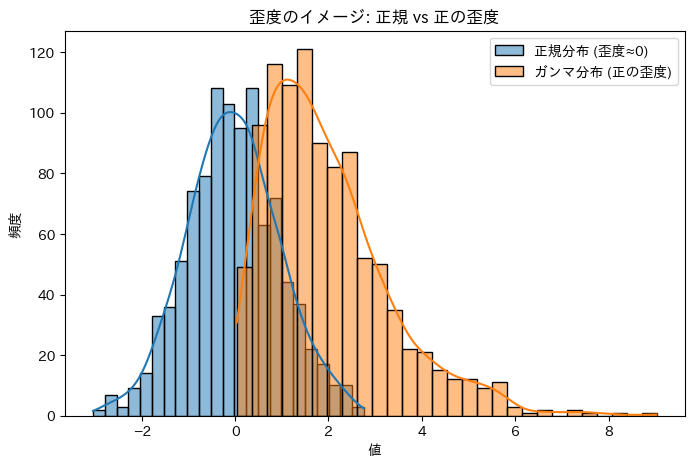

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 標準正規分布と正の歪度を持つ分布の例
np.random.seed(0)
data_sym = np.random.normal(loc=0, scale=1, size=1000)
data_pos = np.random.gamma(shape=2, scale=1, size=1000)  # 正の歪度

plt.figure(figsize=(8, 5))
sns.histplot(data_sym, kde=True, color='C0', label='正規分布 (歪度≈0)')
sns.histplot(data_pos, kde=True, color='C1', label='ガンマ分布 (正の歪度)')
plt.legend()
plt.title('歪度のイメージ: 正規 vs 正の歪度')
plt.xlabel('値')
plt.ylabel('頻度')
plt.show()

### SciPy skew() API の説明

- scipy.stats.skew(x, axis=0, bias=True) はデータの歪度を計算する関数
- x: 分析対象の配列（1次元または多次元）
- axis: 計算する軸（デフォルト: 0）
- bias: True の場合母集団歪度を計算、False の場合不偏歪度を計算

例:
```python
from scipy.stats import skew
g_pop  = skew(data, bias=True)   # 母集団歪度を計算
g_samp = skew(data, bias=False)  # 標本歪度を計算
```

## 尖度（Kurtosis）

- 分布のピークや裾の厚さを示す指標
- 裾が厚い（heavy tails）は外れ値の発生確率が高い
- 正規分布の尖度は 3（多くのライブラリでは excess kurtosis = 0 と扱う）

標本尖度の数式:
$\hat{g}_2 = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^n \left(\frac{x_i-\bar{x}}{s}\right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}$

### なぜ尖度（Kurtosis）が必要か

- 裾の厚さ（尾部）を把握し、外れ値リスクを評価できる
- 正規分布と比べて裾の厚さがどれほど異なるか理解できる
- 金融のリスク管理や品質管理で尾部リスクを定量化する際に重要

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 標準正規分布と裾の厚い分布の例 (t 分布)
np.random.seed(1)
data_norm = np.random.normal(loc=0, scale=1, size=1000)
data_t    = np.random.standard_t(df=3, size=1000)  # heavy tails

plt.figure(figsize=(8,5))
sns.histplot(data_norm, kde=True, stat='density', color='C0', label='正規分布 (K≈3)')
sns.histplot(data_t,    kde=True, stat='density', color='C1', label='t分布 (heavy tails)')
plt.legend()
plt.title('尖度のイメージ: 正規 vs t分布')
plt.xlabel('値')
plt.ylabel('密度')
plt.show()

### SciPy kurtosis() API の説明

- scipy.stats.kurtosis(x, axis=0, fisher=True, bias=True) はデータの尖度を計算する関数
- x: 分析対象の配列（1次元または多次元）
- axis: 計算する軸（デフォルト: 0）
- fisher: True で excess kurtosis (正規分布は 0) を返し、False で通常の尖度 (正規分布は 3)
- bias: True の場合母集団尖度を計算、False の場合不偏尖度を計算

例:
```python
from scipy.stats import kurtosis
ex = kurtosis(data, fisher=True, bias=False)   # excess kurtosis
un = kurtosis(data, fisher=False, bias=False)  # normal kurtosis
```

### 尖度の計算例

```python
import numpy as np
from scipy.stats import kurtosis

data = np.array([2, 4, 6, 8, 10])
s = np.std(data, ddof=1)  # 標本標準偏差
# kurtosis(..., fisher=False) で通常の尖度 (正規分布は 3) を計算
k = kurtosis(data, fisher=False, bias=False)
print(f"標本尖度: {k:.4f}")
```

## 箱ひげ図（Box Plot）

- データの分位点（Q1, Q2, Q3）と外れ値を可視化
- 箱は Q1 と Q3 の範囲（IQR）を表し、中央線は中央値
- ひげは 1.5 × IQR を超えない範囲の最小・最大を示し、それを超える点は外れ値としてプロット
- 箱の上下辺はそれぞれ第1四分位点（Q1）と第3四分位点（Q3）を表す。箱内の線は中央値（Q2）を示す。
- ひげは Q1−1.5×IQR ～ Q3＋1.5×IQR の範囲内にある最小値・最大値を描画。
- 範囲外の点は「外れ値」としてプロットし、極端な値の検出に役立つ。
- 箱ひげ図は複数のグループの分布比較やデータの偏り・散らばり具合を直感的に把握できる。
- 標本サイズが小さい場合や外れ値の定義（1.5×IQR）は状況に応じて調整が必要。

```python
import matplotlib.pyplot as plt

# all_data, data_labels は前述の通り
plt.boxplot(all_data, labels=data_labels)
plt.title('箱ひげ図の例')
plt.ylabel('値')
plt.show()
```

### 箱ひげ図の構成要素
- 箱の上下辺: 第1四分位点（Q1）、第3四分位点（Q3）
- 箱内の線: 中央値（Q2）
- ひげ: Q1−1.5×IQR 〜 Q3＋1.5×IQR の範囲内の最小値・最大値


In [2]:
# 四分位点を計算する例
import numpy as np
data = np.array([2, 4, 6, 8, 10])  # サンプルデータ
q1, q2, q3 = np.percentile(data, [25, 50, 75])
print(f"Q1={q1}, Q2={q2}, Q3={q3}")


data = np.array([2, 4, 6, 8, 10, 12])  # サンプルデータ
q1, q2, q3 = np.percentile(data, [25, 50, 75])
print(f"Q1={q1}, Q2={q2}, Q3={q3}")


Q1=4.0, Q2=6.0, Q3=8.0
Q1=4.5, Q2=7.0, Q3=9.5


data: [ 45  48  65  68  68  10  84  22  37  88  71  89  89  13  59  66  40  88
  47  89  82  38  26  78  73  10  21  81  70  80  48  65  83 100  89  50
  30  20  20  15  40  33  66  10  58  33  32  75  24  36]
data(sorted): [10, 10, 10, 13, 15, 20, 20, 21, 22, 24, 26, 30, 32, 33, 33, 36, 37, 38, 40, 40, 45, 47, 48, 48, 50, 58, 59, 65, 65, 66, 66, 68, 68, 70, 71, 73, 75, 78, 80, 81, 82, 83, 84, 88, 88, 89, 89, 89, 89, 100]
Q1=32.25, Q2=54.0, Q3=77.25


/tmp/ipykernel_103265/982849212.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_large, labels=['データ（n=50）'])


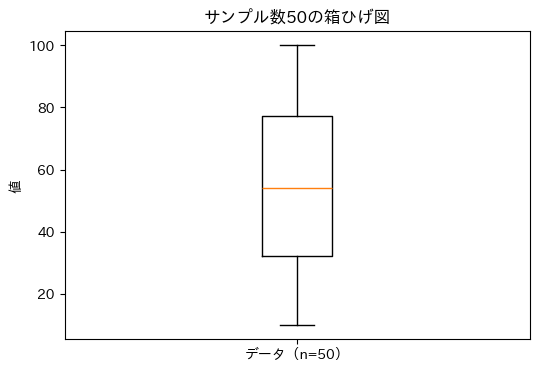

In [13]:
# サンプル数を10倍にして四分位点と箱ひげ図を描画
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
data_large = np.random.randint(1, 101, size=50)  # ランダム整数50個
print(f"data: {data_large}")
print(f"data(sorted): {[int(x) for x in sorted(data_large)]}")

q1, q2, q3 = np.percentile(data_large, [25, 50, 75])
print(f"Q1={q1}, Q2={q2}, Q3={q3}")
plt.figure(figsize=(6,4))
plt.boxplot(data_large, labels=['データ（n=50）'])
plt.title('サンプル数50の箱ひげ図')
plt.ylabel('値')
plt.show()


In [2]:
# IQR とひげ範囲を計算する例
iqr = q3 - q1
whisker_low = q1 - 1.5 * iqr
whisker_high = q3 + 1.5 * iqr
print(f"whisker range: {whisker_low}〜{whisker_high}")


whisker range: -2.0〜14.0


### 箱ひげ図の読み方
- 箱の幅が狭いほどデータのばらつきが小さい
- ひげが長いほど外れ値を含む範囲が広い
- 箱が中心からずれるとデータに偏りがある


### 注意点
- 標本サイズが小さいとIQRの信頼性が低下
- 外れ値定義は状況に応じて調整可能
- 箱ひげ図だけではデータの細かな分布は判断しにくい


### 実例1: 正規分布 vs ガンマ分布
標準正規分布と正の歪度を持つガンマ分布を比較する箱ひげ図。裾の長さや中央値の違いを確認できる。

/tmp/ipykernel_103265/3287862462.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_data, labels=labels)


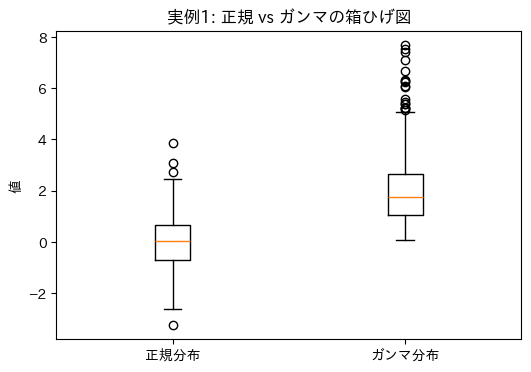

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# データ生成
np.random.seed(42)
data_norm = np.random.normal(loc=0, scale=1, size=500)
data_gamma = np.random.gamma(shape=2, scale=1, size=500)
all_data = [data_norm, data_gamma]
labels = ['正規分布', 'ガンマ分布']

plt.figure(figsize=(6,4))
plt.boxplot(all_data, labels=labels)
plt.title('実例1: 正規 vs ガンマの箱ひげ図')
plt.ylabel('値')
plt.show()


### 実例2: 異なるスケールのデータ比較
スケール（標準偏差）が異なる2つの正規分布を比較し、箱の幅やひげの長さで分散の差を把握する。

/tmp/ipykernel_103265/847805921.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_data, labels=labels)


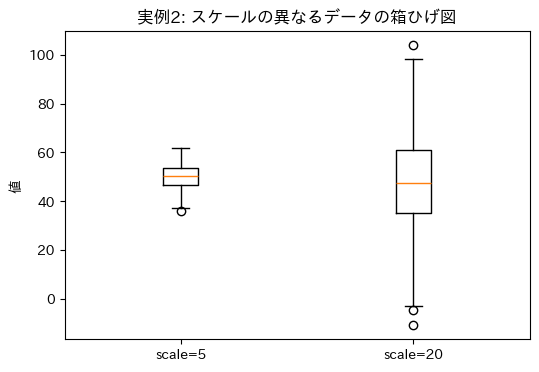

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# データ生成
np.random.seed(0)
data_small = np.random.normal(loc=50, scale=5, size=300)
data_large = np.random.normal(loc=50, scale=20, size=300)
all_data = [data_small, data_large]
labels = ['scale=5', 'scale=20']

plt.figure(figsize=(6,4))
plt.boxplot(all_data, labels=labels)
plt.title('実例2: スケールの異なるデータの箱ひげ図')
plt.ylabel('値')
plt.show()
